## Bài toán 1:THẢM HỌA ĐẮM TÀU TITANIC(HỌC CÓ GIÁM SÁT - Binary Classification)
----
**Mô tả dự án**: Thảm họa đắm tàu Titatic là thảm họa hàng hải lớn nhất trong lịch sử. Chuyến ra khơi đầu tiên của con tàu vào ngày 15/4/1912, Titanic đã  bị chìm sau khi va vào một tảng băng trôi, làm chết 1502 trong tổng số 2224 hành khách và thủy thủ đoàn.  
Một số người may mắn thoát chết như phụ nữ, trẻ em và những người thuộc tầng lớp thượng lưu. 

![alt text](https://i.ytimg.com/vi/rs9w5bgtJC8/maxresdefault.jpg)

Trong dự án này sẽ sử dụng các thuật toán học máy để đự đoán 1 hành khách sẽ được cứu hay không dựa vào các thông tin của hành khách. (Thuộc nhóm bài toán phân lớp nhị phân = Sống|Chết)


**Yêu cầu:**  Dựa vào các thuộc tính của hành khách  để phân lớp hành khách này thuộc nhóm 0|Không được cứu - 1|Được cứu.

**Tập dữ liệu bao gồm:**


*   Tập Train: 891 hành khách (với đầy đủ các thông tin, và thuộc tính Survial cho biết hành khách được cứu hay không)
*  Tập Test: 418 mẫu

[Link tải file data của bài toán:](https://humgedu-my.sharepoint.com/:f:/g/personal/taquangchieu_humg_edu_vn/EriTSXz-oSBGjDpSAPoG4wkB8oxBNv50dcFyqn6S8uxWwg?e=7e8S7N)
  
  Mỗi hành khách (mẫu) bao gồm các thuộc tính:
  

1.  PassengerId: ID của hành khách
2.  Survival: Thuộc tính cho biết hành khách được cứu hay không (ground truth) 0 = No (Không được cứu); 1 = Yes (Được cứu)
3.   Pclass: Loại vé tàu (Cho biết Địa vị xã hội): 1 - Hạng nhất; 2 - Hạng hai; 3 - Hạng 3
4.   Name: Tên của hành khách
5.  Sex: Giới tính (Male/Female)
6. Age: Tuổi (Tính theo năm)
7. SibSp: Số lượng anh chị em/bạn đời trên khoang tàu 
8. Parch: Số lượng cha mẹ/con cái trên khoang tàu
9. Ticket: Số hiệu vé
10. Fare: Phí hành khách
11. Cabin: Số hiệu cabin
12. Embarked: Cổng lên tàu (C = Cherourg; Q = Queenstown, S=Southampton)

----
quangchieu.ta@gmail.com

In [ ]:
#Gọi các thư viện sử dụng cho Project:

# Gọi các package thực hiện chuẩn bị dữ  liệu 
import pandas as pd
import numpy as np
import random as rnd

# Gọi các package hỗ  trợ trực quan hóa dữ liệu (visualization)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### 1) Tải tập dữ liệu Train - Test
---


*   Train: 891 mẫu (Một số thông tin về tập Train: tổng số 891 - chiếm 40% số lượng hành khách thực tế trên tàu (2.224), Gần 30% hành khách có anh chị em và/hoặc vợ, chồng trên tàu; Giá vé thay đổi đáng kể <1% hành khách trả cao tới 512USD; Số lượng hành khách cao tuổi <1% trong độ tuổi 65-80 tuổi; 65% hành khách là Nam (577/891); bao gồm 12 thuộc tính như ở phần mô tả bài toán)




*   Test: 418 mẫu (bao gồm 11 thuộc tính (Ko chứa thuộc tính Survival))




In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

# from google.colab import drive
# drive.mount('/content/gdrive/My Drive/Colab Notebooks/Data_File/Data_titanic/train_titanic.csv')

Mounted at /content/gdrive


In [ ]:
#TẢI TẬP DỮ LIỆU TRAIN ĐỂ SỬ DỤNG:
#Xác định đường dẫn tới file dữ liệu:

#Lưu ý: cần thay đổi đường dẫn đến file dữ liệu trên máy ứng với tài khoản của bạn

path_train ="/content/gdrive/My Drive/Colab Notebooks/Data_File/Data_Titanic/train_titanic.csv"

#Đọc dữ liệu tập train từ file csv vào biến train_df:
train_df = pd.read_csv(path_train)
print('Kiểu dữ liệu: ', type(train_df))

Kiểu dữ liệu:  <class 'pandas.core.frame.DataFrame'>


In [ ]:
#Tải tập dữ liệu Test:
path_test = "/content/gdrive/My Drive/Colab Notebooks/Data_File/Data_Titanic/test_titanic.csv"
test_df = pd.read_csv(path_test)

**Quan sát tập dữ liệu**

In [ ]:
#Hiển thị dữ liệu của train_df
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#df.head(num): Hiển thị num dòng đầu tiên của Dataframe, mặc định num = 5
#Hiển thị 10 dòng đầu tiên của tập dữ liệu train:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#df.tail(num): Hiển thị num dòng cuôi cùng của Dataframe, mặc định num = 5
#Hiển thị 5 dòng cuối cùng của tập dữ liệu train:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Chỉ định dòng hiển thị trong Dataframe:
#Hiển thị thông tin hành khách từ 100 đến 120:
train_df[99:119]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
99,100,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,244367,26.0000,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S


In [ ]:
#Hiển thị danh sách tên của các cột(columns) trong Dataframe:
print("Danh sách cột dữ liệu trong DataFrame: Tập Train")
train_df.columns.values

Danh sách cột dữ liệu trong DataFrame: Tập Train


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
#Hiển thị danh sách thông tin 10 hành khách đầu tiên
train_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#Hiển thị danh sách thông tin 10 hành khách cuối cùng
train_df[881:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
#Chỉ định cột hiển thị dữ liệu:
#Tạo biến Data chỉ lấy Tên - Giới tính - Được cứu/không của tập dữ liệu Train:
data= train_df[['Name','Sex','Survived']]
data

,Name,Sex,Survived
0,"Braund, Mr. Owen Harris",male,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1
2,"Heikkinen, Miss. Laina",female,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1
4,"Allen, Mr. William Henry",male,0
...,...,...,...
886,"Montvila, Rev. Juozas",male,0
887,"Graham, Miss. Margaret Edith",female,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,0
889,"Behr, Mr. Karl Howell",male,1


In [ ]:
#Lấy giá trị theo row và column theo chỉ số: df.iloc[[row],[column]]
#Lấy tên của hành khách thứ thứ 5 (row = 5, column = 3)
train_df.iloc[[5],[3]]


,Name
5,"Moran, Mr. James"


In [ ]:
#Lấy giá trị theo tên column:
#Lấy tên của hành khách thứ 10
train_df.loc[10,'Name']

'Sandstrom, Miss. Marguerite Rut'

In [ ]:
#Lọc dữ liệu theo chỉ số row và chọn cột lấy dữ liệu:
#Lấy dữ liệu Name - Sex - Age - Survived của hành khách từ 15 - 30

train_df.loc[15:30][['Name','Sex','Age','Survived']]

,Name,Sex,Age,Survived
15,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,1
16,"Rice, Master. Eugene",male,2.0,0
17,"Williams, Mr. Charles Eugene",male,NaN,1
18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,0
19,"Masselmani, Mrs. Fatima",female,NaN,1
20,"Fynney, Mr. Joseph J",male,35.0,0
21,"Beesley, Mr. Lawrence",male,34.0,1
22,"McGowan, Miss. Anna ""Annie""",female,15.0,1
23,"Sloper, Mr. William Thompson",male,28.0,1
24,"Palsson, Miss. Torborg Danira",female,8.0,0


### 2) Phân tích số liệu tập Train

In [ ]:
#Xem thông tin tổng quan của dữ liệu tập Train:
#Cho biết: Số row, số column, số lượng dữ liệu không null, kiểu dữ liệu của từng thuộc tính 
#trong Dataframe

print(train_df.info())

##Tập train: Các thuộc tính ko đủ: Age(714) - Cabin(204) - Embarked(889)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
#Xác định kích cỡ của Dataframe:
print('Kích thước của tập huấn luyện: ', train_df.shape)

#Đếm số dòng dữ liệu không chứa giá trị null theo từng cột: df.count()
print('Thống kê số liệu trong tập huần luyện:')
print(train_df.count())

Kích thước của tập huấn luyện:  (891, 12)
Thống kê số liệu trong tập huần luyện:
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [ ]:
#Thống kê số lượng dữ liệu bị thiếu (missing data) trong tập huấn luyện:
#df.isnull().sum()

print('Số lượng missing data trong tập Train:')
print(train_df.isnull().sum())

Số lượng missing data trong tập Train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#Phân tích số liệu tập Train
#Thực hiện các Thông kê với các thuộc tính số
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Thông kê tập dữ liệu Train các thuộc tính có dtype: Object
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Coelho, Mr. Domingos Fernandeo",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Phân tích các thuộc tính chủ chốt của dữ liệu hành khách ảnh hưởng tới survived:

Phân tích nhanh mối tương quan giữa các thuộc tính chủ chốt, có thể thực hiện với các thuộc tính không có bất kỳ giá trị trống nào. 

Thực hiện với các thuộc tính kiểu Categorical (Sex), thứ tự - Ordinal (Pclass), rời rạc - Discrete (Sibsp, Parch)

* Pclass: có mối tương quan đáng kể (>0.5) của Pclass = 1 và được cứu sống (Survived)
* Sex: = female có tỷ lệ được cứu sống rất cao (74%)


In [ ]:
#Phân tích các đặc tính chủ chốt của tập dữ liệu Train
#Đặc tính Hạng vé tàu - Pclass:

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
#Đặc tính Giới tính - Sex:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
#Đặc tính quan hệ anh chị em, bạn đời - Sibsp:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
#Đặc tính số lượng cha mẹ/con cái trên tàu - Parch:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
#Đặc tính cảng hành khách lên tàu - Embarked:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### 3) Trực quan hóa tập dữ liệu train
---
Thực hiện phân tích tập dữ liệu Train sử dụng phương pháp trực quan hóa dữ liệu, thu được những nhận xét như sau:




<Figure size 432x288 with 0 Axes>

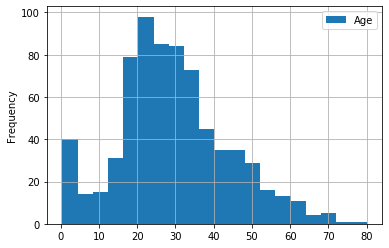

In [ ]:
#Biểu đồ tần xuất theo độ tuổi của tập dữ liệu
plt.figure()
train_df[['Age']].plot.hist(alpha=1, bins=20)
plt.grid(True)

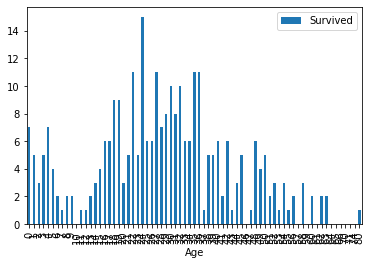

In [ ]:
#t= train_df1.groupby(['Age']).sum()
t = train_df[['Age','Survived']].dropna().astype(int)
t= t.groupby(['Age']).sum().sort_values(by='Age', ascending=True)
t.plot.bar()

SỰ TƯƠNG QUAN CỦA CÁC THUỘC TÍNH SỐ (age với Survived)


Quan sát dữ liệu Tuổi:


*   Trẻ em (Tuổi <=4) có tỷ lệ được cứu cao
*   Các hành khách già nhất (Tuổi = 80) đều được cứu
*   Một lượng lớn hành khách trong độ tuổi từ 15 - 25 không được cứu
*  Hầu hết hành khách trong độ tuổi từ 15 - 35

Xem xét:

*  Cho thuộc tính Age vào mô hình huấn luyện
*  Xử lý một số dữ liệu missing của thuộc tính age
*  Nhóm các độ tuôi theo từng group


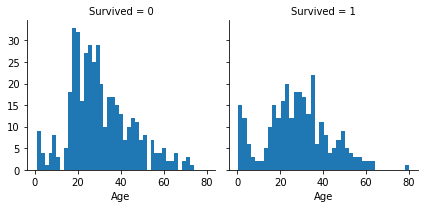

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=40)

MỐI TƯƠNG QUAN GIỮA CÁC THUỘC TÍNH KIỂU SỐ VÀ THỨ TỰ (Pclass, Age với Survived):

Kết hợp nhiều thuộc tính khác nhau để xác định mối tương quan bằng cách sử dụng một biểu đồ đơn. Điều này có thể được thực hiện với các thuộc tính có kiểu dữ liệu số số.

Quan sát dữ liệu:

* Hầu hết hành khách có (Pclass) Vé tàu hạng 3, tuy nhiên hầu hết những hành khách này đều không được cứu.
* Các hành khách trẻ em có vé hạng 2 và hạng 3 hầu hết được cứu.
* Hầu hết hành khách có vé hạng 1 đều được cứu.
* Phân bố độ tuổi của hành khác khác nhau với các Pclass khác nhau.

Xem xét: 
* Cho thuộc tính Pclass vào mô hình huấn luyện

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


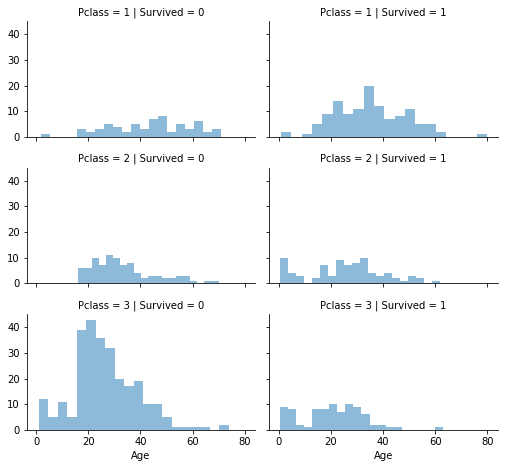

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

SỰ TƯƠNG QUAN CỦA CÁC THUỘC TÍNH (Sex, Pclass, Embarked với Survived).

Quan sát dữ liệu:
* Các hành khách nữ có tỷ lệ cứu sống cao hơn hành khách nam.
* Loại trừ trường hợp thuộc tính Embarked = C có tỷ lệ hành khách nam được cứu sống cao hơn, còn lại các trường hợp khác của thuộc tính Embarked, tỷ lệ nữ được cứu đều cao hơn. Điều này có thể là một sự tương quan giữa thuộc tính Pclass và thuộc tính Embarked, và trở lại Pclass với Survived, không nhất thiết tương quan trực tiếp giữa thuộc tính Embarked và Survived.
* Hành khách nam có tỷ lệ được cứu sống cao hơn trong Pclass = 3 khi so sánh với Pclass = 2 với các cảng C và Q.
* Vị trí cảng lên tàu có tỷ lệ được cứu sống khác nhau cho Pclass = 3 và đối với hành khách là nam.

Xem xét:
* Bổ sung thuộc tính Sex vào mô hình huấn luyện.
* Hoàn chỉnh và bổ sung thuộc tính Embarked vào mô hình huấn luyện



C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


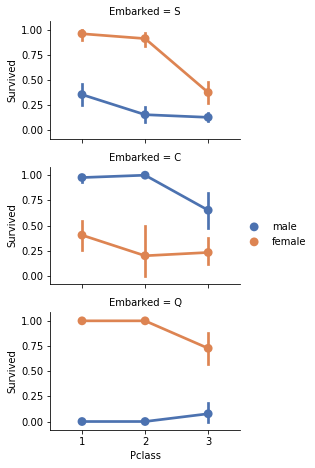

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()


SỰ TƯƠNG QUAN CỦA CÁC THUỘC TÍNH Categorical và numerical (Fare, Embarked, Sex với Survived)

Quan sát dữ liệu: 
* Các hành khách trả tiền vé tàu cao hơn có tỷ lệ được cứu sống cao hơn.
* Cảng lên tàu của hành khách có sự tương quan với tỷ lệ được cứu sống.

Xem xét:
*  Cân nhắc nhóm thuộc tính Fare thành từng khoảng.


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


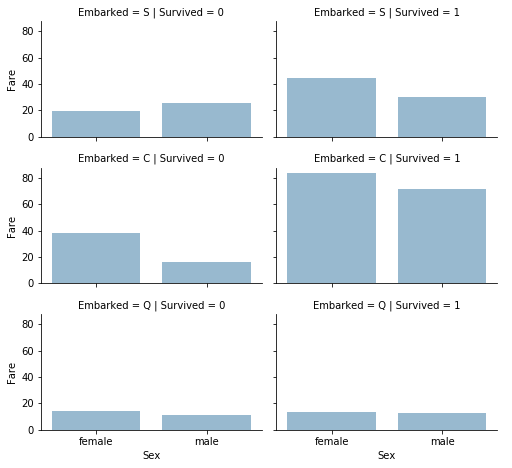

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### 4) Tiền xử lý dữ liệu

#### 3.1) Loại bỏ các thuộc tính không sử dụng cho mô hình
---
Loại bỏ 3 thuộc tính **PassengerId, Ticket, Cabin** không tham gia vào mô hình huấn luyện trong file dữ liệu  Train/Test.

In [ ]:
#Thực hiện loại bỏ một số thuộc tính không ảnh hưởng đến dự báo
#df.drop([tên thuộc tính], axis=1): Loại bỏ toàn bộ cả thuộc tính (Xóa theo columns)

path_train ="/content/gdrive/My Drive/Colab Notebooks/Data_File/Data_Titanic/train_titanic.csv"

#Đọc dữ liệu tập train từ file csv vào biến train_df:
train_df = pd.read_csv(path_train)
print("Dữ liệu tập huấn luyện trước khi xử lý:", train_df.shape)
print('Danh sách các thuộc tính:', train_df.columns.values)

train_df1 = train_df.drop(['PassengerId','Ticket', 'Cabin'], axis=1)
print('-----------------------------------------------------')

print("Dữ liệu tập huấn luyện xau khi xử lý:", train_df1.shape)
print('Danh sách các thuộc tính:', train_df1.columns.values)

Dữ liệu tập huấn luyện trước khi xử lý: (891, 12)
Danh sách các thuộc tính: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
-----------------------------------------------------
Dữ liệu tập huấn luyện xau khi xử lý: (891, 9)
Danh sách các thuộc tính: ['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']


In [ ]:
#Quan sát dữ liệu huấn luyện sau khi loại bỏ một số thuộc tính ko sử dụng:

train_df1.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [ ]:
train_df1.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

#### 3.2) Bổ sung thêm thuộc tính mới từ thuộc tính đã có trong tập dữ liệu
----
Trong đoạn mã dưới đây, chúng ta sẽ trích xuất thêm thuộc tính "Title" bằng cách sử dụng các biểu thức thông thường. Mẫu RegEx(\w+\.) phù hợp với từ đầu tiên kết thúc bằng ký tự dấu chấm trong thuộc tính "Name".

Khi thể hiện thông tin các thuộc tính Title, Age và Survived, chúng ta chú ý các quan sát sau:
* Hầu hết các nhóm tuổi chính xác, ví dụ: title = "Master" có độ tuổi trung bình 5 tuổi.

##### a) Tạo thuộc mới thuộc tính Title từ thuộc tính Name.
---
Thuộc tính Title thực hiện việc tách lấy chuỗi đầu tiên trong tên của hành khách,

In [ ]:
#Cắt chuỗi đầu tiên sau dấu chấm (.) trong thuộc tính Name cho sang thuộc tính mới Title của tập dữ liệu Train. 
train_df1['Title'] = train_df1.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_df1[240:250]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
240,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C,Miss
241,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,15.5000,Q,Miss
242,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,10.5000,S,Mr
243,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,7.1250,S,Mr
244,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,7.2250,C,Mr
245,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,90.0000,Q,Dr
246,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,7.7750,S,Miss
247,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,14.5000,S,Mrs
248,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,52.5542,S,Mr
249,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,26.0000,S,Rev


In [ ]:
#Thống kê các kết quả cắt chuỗi đầu tiên trong tên của hành khách với thuộc tính giới tính
pd.crosstab(train_df1['Title'], train_df1['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
#CHuẩn hóa dữ liệu Title về một số nhóm cơ bản:
#Thay thế nhiều giá trị của thuộc tính Title bằng một cái tên phổ biến hơn hoặc phân loại chúng là Rate
#df.replace(): Thực hiện thay thế giá trị trong dataframe

train_df1['Title'] = train_df1['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df1['Title'] = train_df1['Title'].replace('Mlle', 'Miss')
train_df1['Title'] = train_df1['Title'].replace('Ms', 'Miss')
train_df1['Title'] = train_df1['Title'].replace('Mme', 'Mrs')

In [ ]:
train_df1[240:250]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
240,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C,Miss
241,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,15.5000,Q,Miss
242,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,10.5000,S,Mr
243,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,7.1250,S,Mr
244,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,7.2250,C,Mr
245,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,90.0000,Q,Rare
246,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,7.7750,S,Miss
247,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,14.5000,S,Mrs
248,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,52.5542,S,Mr
249,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,26.0000,S,Rare


In [ ]:
#Thông kê mối tương quan giữa thuộc tính Title và Survived

train_df1[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Thực hiện xóa thuộc tính **Name** ko sử dụng khỏi tập dữ liệu huấn luyện

---



In [ ]:
#Loại bỏ thuộc tính Nam và PassengerID ra khỏi file dữ liệu

print("Dữ liệu tập huấn luyện trước khi xử lý:", train_df1.shape)
print('Danh sách các thuộc tính:\n', train_df1.columns.values)

train_df2 = train_df1.drop(['Name'], axis=1)

print("Dữ liệu xau khi xử lý Bước 2 chuẩn hóa thuộc tính Title và loại bỏ thuộc tính Name:")

print("Dữ liệu tập huấn luyện trước khi xử lý:", train_df2.shape)
print('Danh sách các thuộc tính:\n', train_df2.columns.values)

Dữ liệu tập huấn luyện trước khi xử lý: (891, 10)
Danh sách các thuộc tính:
 ['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked'
 'Title']
Dữ liệu xau khi xử lý Bước 2 chuẩn hóa thuộc tính Title và loại bỏ thuộc tính Name:
Dữ liệu tập huấn luyện trước khi xử lý: (891, 9)
Danh sách các thuộc tính:
 ['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title']


In [ ]:
train_df1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

##### b) Tạo thuộc tính IsAlone, cho biết hành khách đi một mình hay đi với người thân trên tàu
---

*   Bước 1: Tạo thuộc tính FamilySize: cho biết tổng số người thân đi trên tàu (FamilySize = Parch + SibSp)
*   Bước 2: Từ thuộc tính FamilySize tạo thuộc tính IsAlone (Khởi tạo giá trị = 0| sau đó thay giá trị = 1 với những người đi một mình (FamilySize = 1)
*   Bước 3: Xóa dữ liệu thuộc tính Parch, SibSp, FamilySize ko sử dụng cho mô hình.


In [ ]:
#Bước 1: Tạo thuộc tính mới FamilySize từ 2 thuộc tính SibSp và Parch

train_df2['FamilySize'] = train_df2['SibSp'] + train_df2['Parch']
train_df2.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,0
5,0,3,male,NaN,0,0,8.4583,Q,Mr,0
6,0,1,male,54.0,0,0,51.8625,S,Mr,0
7,0,3,male,2.0,3,1,21.0750,S,Master,4
8,1,3,female,27.0,0,2,11.1333,S,Mrs,2
9,1,2,female,14.0,1,0,30.0708,C,Mrs,1


In [ ]:
#Xác định mối tương quan giữa FamilySize với Survived:
train_df2[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [ ]:
#Bước 2: Tạo ra đặc tính mới có tên là IsAlone cho tập dữ liệu
#Thuộc tính này cho biết hành khách đi một mình (=1) hay đi với người thân (=0)

#B2.1: Thêm thuộc tính IsAlone có giá trị mặc định = 0 cho tất cả các hành khách
train_df2['IsAlone'] = 0

train_df2.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,Mr,1,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1,0
2,1,3,female,26.0,0,0,7.9250,S,Miss,0,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1,0
4,0,3,male,35.0,0,0,8.0500,S,Mr,0,0
5,0,3,male,NaN,0,0,8.4583,Q,Mr,0,0
6,0,1,male,54.0,0,0,51.8625,S,Mr,0,0
7,0,3,male,2.0,3,1,21.0750,S,Master,4,0
8,1,3,female,27.0,0,2,11.1333,S,Mrs,2,0
9,1,2,female,14.0,1,0,30.0708,C,Mrs,1,0


In [ ]:
#B2.2: Xác định lại giá trị thuộc tính IsAlone: FamilySize = 1 thì giá trị IsAlone =0
# IsAlone = 1 (Hành khách đi một mình)

train_df2.loc[train_df2['FamilySize']==0,'IsAlone'] = 1

train_df2.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,Mr,1,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1,0
2,1,3,female,26.0,0,0,7.9250,S,Miss,0,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1,0
4,0,3,male,35.0,0,0,8.0500,S,Mr,0,1
5,0,3,male,NaN,0,0,8.4583,Q,Mr,0,1
6,0,1,male,54.0,0,0,51.8625,S,Mr,0,1
7,0,3,male,2.0,3,1,21.0750,S,Master,4,0
8,1,3,female,27.0,0,2,11.1333,S,Mrs,2,0
9,1,2,female,14.0,1,0,30.0708,C,Mrs,1,0


In [ ]:
#Xác định mối tương quan giữa thuộc tính IsAlone - Survived

train_df2[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
#Bước 3: Xóa các thuộc tính Parch, SibSp, FamilySize 

print("Dữ liệu tập huấn luyện trước khi xử lý:", train_df2.shape)
print('Danh sách các thuộc tính:\n', train_df2.columns.values)

train_df3 = train_df2.drop(['Parch','SibSp','FamilySize'],axis=1)

print("Dữ liệu tập huấn luyện sau khi xử lý:", train_df3.shape)
print('Danh sách các thuộc tính:\n', train_df3.columns.values)

Dữ liệu tập huấn luyện trước khi xử lý: (891, 11)
Danh sách các thuộc tính:
 ['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title'
 'FamilySize' 'IsAlone']
Dữ liệu tập huấn luyện sau khi xử lý: (891, 8)
Danh sách các thuộc tính:
 ['Survived' 'Pclass' 'Sex' 'Age' 'Fare' 'Embarked' 'Title' 'IsAlone']


In [ ]:
train_df3.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,male,22.0,7.2500,S,Mr,0
1,1,1,female,38.0,71.2833,C,Mrs,0
2,1,3,female,26.0,7.9250,S,Miss,1
3,1,1,female,35.0,53.1000,S,Mrs,0
4,0,3,male,35.0,8.0500,S,Mr,1
5,0,3,male,NaN,8.4583,Q,Mr,1
6,0,1,male,54.0,51.8625,S,Mr,1
7,0,3,male,2.0,21.0750,S,Master,0
8,1,3,female,27.0,11.1333,S,Mrs,0
9,1,2,female,14.0,30.0708,C,Mrs,0


#### 3.3) Chuyển đổi dữ liệu thuộc tính sang dạng số
----
Lưu ý: Các model chỉ thực hiện trên dữ liệu số, do đó cần phải chuyển đổi tất cả dữ liệu về dạng số:

Một số thuộc tính của tập dữ liệu không phải dữ liệu số, trong bước này sẽ thực hiện chuyển đổi các dữ liệu này về dạng số để thuận lợi cho việc đưa vào mô hình huấn luyện.

Các thuộc tính cần chuyển đổi bao gồm:
* Title - Sex - Embarked

In [ ]:
#Chuyển đổi thuộc tính Sex về dạng số nguyên (int)
# trong đó: Female = 1; Male = 0

train_df3['Sex'] = train_df3['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#Hiển thị dữ liệu 5 mẫu đầu tiên trong tập dữ liệu Train sau khi đã chuyển đổi.
train_df3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,7.2500,S,Mr,0
1,1,1,1,38.0,71.2833,C,Mrs,0
2,1,3,1,26.0,7.9250,S,Miss,1
3,1,1,1,35.0,53.1000,S,Mrs,0
4,0,3,0,35.0,8.0500,S,Mr,1


In [ ]:
#Chuyển đổi thuộc tính Embarked về dạng số nguyên (int)
# Trong đó: S = 0, C = 1, Q = 2

#Lưu ý: Trong thuộc tính Embarked có một số missing data, sử dụng dropna() để loại bỏ các hành khách mising
#trước khi chuyển đổi sang số.

train_df3['Embarked'] = train_df3['Embarked'].dropna().map( {"S": 0, "C": 1, "Q": 2} ).astype(int)


train_df3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,7.2500,0.0,Mr,0
1,1,1,1,38.0,71.2833,1.0,Mrs,0
2,1,3,1,26.0,7.9250,0.0,Miss,1
3,1,1,1,35.0,53.1000,0.0,Mrs,0
4,0,3,0,35.0,8.0500,0.0,Mr,1


In [ ]:
#Chuyển đổi dữ liệu thuộc tính Title:
#chuyển sang dạng số, với các giá trị tương ứng (1, 2, 3, 4, 5)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

train_df3['Title'] = train_df3['Title'].map(title_mapping).astype(int)

train_df3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22.0,7.2500,0.0,1,0
1,1,1,1,38.0,71.2833,1.0,3,0
2,1,3,1,26.0,7.9250,0.0,2,1
3,1,1,1,35.0,53.1000,0.0,3,0
4,0,3,0,35.0,8.0500,0.0,1,1


In [ ]:
train_df3.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Title         0
IsAlone       0
dtype: int64

#### 3.4) Xử lý dữ liệu mất mát (Missing data)
----
Trong tập dữ liệu có một số giá trị mất mát hoặc có giá trị null, chúng ta cần phải xử lý các dữ liệu này trước khi cho vào mô hình huấn luyện.


#####  3.4.1) Xử lý dữ liệu mất mát của thuộc tính Age

Có một sự tương quan giữa thuộc tính Age, Sex và Pclass. bởi vậy chúng ta sẽ ước chừng giá trị Age tại các vị trí thiếu sử dụng các giá trị trung bình của thuộc tính Age theo các tập của sự kết hợp giữa thuộc tính Pclass và Sex. như, trung bình Age của Pclass = 1 và Sex = 0, Pclass = 1 và Sex = 1...vv.

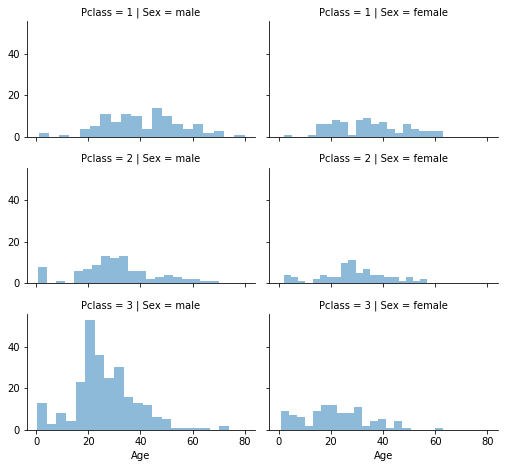

In [ ]:
grid = sns.FacetGrid(train_df2, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

##### A. Thay thế các giá trị missing bằng giá trị trung bình
---

Xây dựng mảng guess_ages (2 (giới tính) x 3 (pclass)) lưu trữ tuổi trung bình của hành khách theo giới tính và pclass. 
 
 Sau đó sẽ thay thế các giá trị null trong thuộc tính Age của các hành khách này dựa vào tuổi trung bình tương ứng với các hành khách có cùng chung thuộc tính Sex và Pclass với hành khách có tuổi null đó.
 
* sex = 0, pclass = 1, có độ tuổi trung bình lưu tại vị trí guess_ages[0,0]
 
* sex = 0, pclass = 2, có độ tuổi trung bình lưu tại vị trí guess_ages[0,1]
 
* sex = 0, pclass = 3, có độ tuổi trung bình lưu tại vị trí guess_ages[0,2]
 
* sex = 1, pclass = 1, có độ tuổi trung bình lưu tại vị trí guess_ages[1,0]
 
* sex = 1, pclass = 2, có độ tuổi trung bình lưu tại vị trí guess_ages[1,1]
 
* sex = 1, pclass = 3, có độ tuổi trung bình lưu tại vị trí guess_ages[1,2]
 

In [ ]:
#Tập Train
#Khởi tạo mảng Empty, chứa các giá trị dự đoán tuổi 
#dựa trên sự kết hợp của thuộc tính Pclass và Sex


guess_ages_train = np.zeros((2,3))

guess_ages_train

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
#Thực hiện tính toán các giá trị trung bình của Age dựa vào Sex và Pclass.
for i in range(0, 2):
   for j in range(0, 3):
            guess_df = train_df3[(train_df3['Sex'] == i) & (train_df3['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
           
            guess_ages_train[i,j] = int(age_guess)
           # guess_ages_train[i,j] = int(age_guess/0.5 + 0.5)*0.5
           # print(i,'--',j, age_guess,'--', guess_ages_train[i,j])

print("Mảng các giá trị tuổi trung bình theo Sex và Pclass của tập Train: ")
print(guess_ages_train)

Mảng các giá trị tuổi trung bình theo Sex và Pclass của tập Train: 
[[40. 30. 25.]
 [35. 28. 21.]]


In [ ]:
#Thực hiện thay thế các giá trị null của thuộc tính Age bằng giá trị trung bình tương ứng với Sex và Pclass đã tính ở trên

for i in range(0, 2):
   for j in range(0, 3):
       train_df3.loc[ (train_df3.Age.isnull()) & (train_df3.Sex == i) & (train_df3.Pclass == j+1),\
                    'Age'] = guess_ages_train[i,j]
train_df3['Age'] = train_df3['Age'].astype(int)

In [ ]:
#Dữ liệu tập train trước khi xử lý missing thuộc tính Tuổi

print('Số dòng missing trước khi xử lý:',train_df1[["Age"]].isnull().sum())
print('Số dòng missing sau xử lý:',train_df3[["Age"]].isnull().sum())

Số dòng missing trước khi xử lý: Age    177
dtype: int64
Số dòng missing sau xử lý: Age    0
dtype: int64


In [ ]:
#Tập dữ liệu huấn luyện sau khi đã xử lý missin thuộc tính tuổi
#Dữ liệu tập train sau khi đã xử lý các dữ liệu missing của thuộc tính Age
train_df3.count()

Survived    891
Pclass      891
Sex         891
Age         891
Fare        891
Embarked    889
Title       891
IsAlone     891
dtype: int64

In [ ]:
#Quan sát dữ liệu trước khi xử lý missing thuộc tính Age
#Tại các vị trí 31, 32 và 36 ko có dữ liệu Age

train_df1[30:40]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
30,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,27.7208,C,Rare
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,146.5208,C,Mrs
32,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,Q,Miss
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,10.5000,S,Mr
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,82.1708,C,Mr
35,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,52.0000,S,Mr
36,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,7.2292,C,Mr
37,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,8.0500,S,Mr
38,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,18.0000,S,Miss
39,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,11.2417,C,Miss


In [ ]:
#Quan sát dữ liệu sau khi xử lý missing thuộc tính Age
# Tại vị trí 31: có Sex = 1, Pclass = 1, sẽ thay thế giá trị missing bằng giá trị trong mảng guess_ages_train[1,0] = 35
# Tại vị trí 32: có Sex = 1, Pclass = 3, sẽ thay thế giá trị missing bằng giá trị trong mảng guess_ages_train[1,2] = 21
# Tại vị trí 31: có Sex = 0, Pclass = 3, sẽ thay thế giá trị missing bằng giá trị trong mảng guess_ages_train[0,2] = 25

train_df3[30:40]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
30,0,1,0,40,27.7208,1.0,5,1
31,1,1,1,35,146.5208,1.0,3,0
32,1,3,1,21,7.7500,2.0,2,1
33,0,2,0,66,10.5000,0.0,1,1
34,0,1,0,28,82.1708,1.0,1,0
35,0,1,0,42,52.0000,0.0,1,0
36,1,3,0,25,7.2292,1.0,1,1
37,0,3,0,21,8.0500,0.0,1,1
38,0,3,1,18,18.0000,0.0,2,0
39,1,3,1,14,11.2417,1.0,2,0


##### B. Nhóm độ tuổi theo từng khoảng giới hạn (Scaling thuộc tính Age)
----

Thực hiện việc nhóm các tuổi lại theo từng khoảng:

* Dưới 16 tuổi       :   --> Age = 0
* Từ 16 --> 32 tuổi:   --> Age = 1
* Từ 32 --> 48 tuổi:   --> Age = 2
* Từ 48 --> 64 tuổi:   --> Age = 4
* Trên 64 tuổi        :   --> Age = 5

In [ ]:
#Quan sát dữ liệu thuộc tính Age của tập dữ liệu

train_df3.Age.describe()

count    891.000000
mean      29.072952
std       13.326339
min        0.000000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

[[ 0  0  0  0  0  0  0  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  6  6  6  7
   7  7  8  8  8  8  9  9  9  9  9  9  9  9 10 10 11 11 11 11 12 13 13 14
  14 14 14 14 14 14 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 16
  16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18
  18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19
  19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20
  20 20 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 21 21
  21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
  21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
  21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
  22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23
  23 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
  24 24 24 24 24 24 24 24 25 25 25 25 

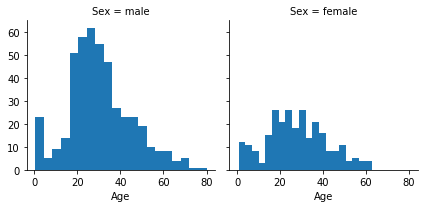

In [ ]:
#Biểu đồ thuộc tính tuổi của hành khách trong tập Train:
x = train_df3.loc[:][['Age']]
x=x.T
y = np.sort(x)
print(y)

g = sns.FacetGrid(train_df, col='Sex')
g.map(plt.hist, 'Age', bins=20)

In [ ]:
#Thêm thuộc tính AgeBand (tạm thời) sử dụng để quan sát tuổi của hành khách phần vào n đoạn 
n=5
train_df3['AgeBand'] = pd.cut(train_df3['Age'], n)

In [ ]:
train_df3[:10]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeBand
0,0,3,0,22,7.2500,0.0,1,0,"(16.0, 32.0]"
1,1,1,1,38,71.2833,1.0,3,0,"(32.0, 48.0]"
2,1,3,1,26,7.9250,0.0,2,1,"(16.0, 32.0]"
3,1,1,1,35,53.1000,0.0,3,0,"(32.0, 48.0]"
4,0,3,0,35,8.0500,0.0,1,1,"(32.0, 48.0]"
5,0,3,0,25,8.4583,2.0,1,1,"(16.0, 32.0]"
6,0,1,0,54,51.8625,0.0,1,1,"(48.0, 64.0]"
7,0,3,0,2,21.0750,0.0,4,0,"(-0.08, 16.0]"
8,1,3,1,27,11.1333,0.0,3,0,"(16.0, 32.0]"
9,1,2,1,14,30.0708,1.0,3,0,"(-0.08, 16.0]"


In [ ]:

train_df3[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [ ]:
#Thay thế tuổi tuyệt đối của hành khách bằng đoạn mà tuổi thuộc vào
#
#Thực hiện thay thế cho cả tập train:
train_df3.loc[ train_df3['Age'] <= 16, 'Age'] = 0
train_df3.loc[(train_df3['Age'] > 16) & (train_df3['Age'] <= 32), 'Age'] = 1
train_df3.loc[(train_df3['Age'] > 32) & (train_df3['Age'] <= 48), 'Age'] = 2
train_df3.loc[(train_df3['Age'] > 48) & (train_df3['Age'] <= 64), 'Age'] = 3
train_df3.loc[ train_df3['Age'] > 64, 'Age'] = 4

train_df3[['Age', 'AgeBand']].head()

,Age,AgeBand
0,1,"(16.0, 32.0]"
1,2,"(32.0, 48.0]"
2,1,"(16.0, 32.0]"
3,2,"(32.0, 48.0]"
4,2,"(32.0, 48.0]"


In [ ]:
train_df3[620:635]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,AgeBand
620,0,3,0,1,14.4542,1.0,1,0,"(16.0, 32.0]"
621,1,1,0,2,52.5542,0.0,1,0,"(32.0, 48.0]"
622,1,3,0,1,15.7417,1.0,1,0,"(16.0, 32.0]"
623,0,3,0,1,7.8542,0.0,1,1,"(16.0, 32.0]"
624,0,3,0,1,16.1000,0.0,1,1,"(16.0, 32.0]"
625,0,1,0,3,32.3208,0.0,1,1,"(48.0, 64.0]"
626,0,2,0,3,12.3500,2.0,5,1,"(48.0, 64.0]"
627,1,1,1,1,77.9583,0.0,2,1,"(16.0, 32.0]"
628,0,3,0,1,7.8958,0.0,1,1,"(16.0, 32.0]"
629,0,3,0,1,7.7333,2.0,1,1,"(16.0, 32.0]"


In [ ]:
#train_df1[train_df1['Age'] > 64]

In [ ]:
#Loại bỏ thuộc tính AgeBand khỏi tâp dữ liệu huấn luyện.

train_df3 = train_df3.drop(['AgeBand'],axis=1)

train_df3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0.0,1,0
1,1,1,1,2,71.2833,1.0,3,0
2,1,3,1,1,7.9250,0.0,2,1
3,1,1,1,2,53.1000,0.0,3,0
4,0,3,0,2,8.0500,0.0,1,1


In [ ]:
#------------KẾT THÚC VIỆC THAY XỬ LÝ DỮ LIỆU AGE---------
train_df4 = train_df3

##### 3.4.2) Xử lý giá trị mất mát của thuộc tính Embarked
---
Thuộc tính Embarked cho biết hành khách lên tàu ở Port nào? Embarked nhận 1 trong  3 giá trị S, Q, C.

Trong thuộc tính Embarked có 2 giá trị missing, để xử lý các giá trị missing này ta thực hiện bằng cách, lấy giá trị xuất hiện nhiều nhất của thuộc tính Embarked để thay thế cho giá trị missing.

Tổng 891 hành khách, có 889 hành khách có giá trị thuộc tính Embarked, 2 hành khách missing.

Lưu ý: Trong phần 3.3 ta đã chuyển đổi dữ liệu từ ký tự sang dữ liệu số: S = 0, C = 1, Q = 2

Trong ba giá trị S, Q, C có số lần xuất hiện như sau:
* 0 (S): 644 lần (Xuất hiện nhiều nhất)
* 1 (C) : 168 lần
* 2 (Q): 77 lần


In [ ]:
#Check số hành khách missing thuộc tính Embarked
print('Số dữ liệu missing của thuộc tính Embarked:',train_df4['Embarked'].isnull().sum())

Số dữ liệu missing của thuộc tính Embarked: 2


In [ ]:
#Thống kê số lần xuất hiện của các giá trị trong thuộc tính Embarked của tập Train

train_df1[['Embarked','Survived']].groupby(['Embarked'], as_index=False).count()

,Embarked,Survived
0,C,168
1,Q,77
2,S,644


In [ ]:
# Thống kê giá trị xuất hiện nhiều nhất của thuộc tính Embarked

train_df1['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
# Thực hiện việc xử lý dữ liệu missing của thuộc tính Embarked:

#B1. Xác định giá trị xuất hiện nhiều nhất của thuộc tính Embarked

#dropna() loại bỏ các trường hợp null
#mode() cho biết giá trị xuất hiện thường xuyên nhất.
# Lưu ý: S = 0, C = 1, Q = 2 

freq_port = train_df4.Embarked.dropna().mode()[0]

print('Port xuất hiện nhiều nhất:',freq_port)

Port xuất hiện nhiều nhất: 0.0


In [ ]:
#B2. Thay thế các giá trị missing của thuộc tính Embarked 
#bằng giá trị xuất hiện nhiều nhất ở trên cho cả tập Train
#df.fillna(x) thực hiện tìm các các giá trị null và thay thế bằng giá trị x

train_df4['Embarked'] = train_df4['Embarked'].fillna(freq_port)

In [ ]:
#Dữ liệu sau khi xử lý missing thuộc tính Embarked:

train_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null int32
Fare        891 non-null float64
Embarked    891 non-null float64
Title       891 non-null int32
IsAlone     891 non-null int64
dtypes: float64(2), int32(3), int64(3)
memory usage: 45.4 KB


In [ ]:
train_df4.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0.0,1,0
1,1,1,1,2,71.2833,1.0,3,0
2,1,3,1,1,7.9250,0.0,2,1
3,1,1,1,2,53.1000,0.0,3,0
4,0,3,0,2,8.0500,0.0,1,1
5,0,3,0,1,8.4583,2.0,1,1
6,0,1,0,3,51.8625,0.0,1,1
7,0,3,0,0,21.0750,0.0,4,0
8,1,3,1,1,11.1333,0.0,3,0
9,1,2,1,0,30.0708,1.0,3,0


#### 3.5) Xử lý dữ liệu thuộc tính Fare
----
Với tập train, thuộc tính fare không có dữ liệu missing. Thực hiện phân chia giá trị trong thuộc tính fare vào từng đoạn, giống như việc xử lý với phân đoạn tuổi.

Thực hiện chia giới hạn của Fare thành 4 đoạn, và chuyển giá trị tương ứng với đoạn:
* <  7.91               ---> 0
* (7.91; 14.45]     ---> 1
* (14.45; 31]        ---> 2
* '' > 31                    ---> 3

Với tập Test: một số giá trị của thuộc tính Fare bị missing data, do đó trước khi tiến hành phân đoạn, cần xử lý các dữ liệu missing này bằng cách thay thế các dữ liệu missing data bằng giá trị trung bình của thuộc tính fare trong toàn bộ tập test.


In [ ]:
#QUAN SÁT DỮ LIỆU THUỘC TÍNH FareBand
train_df4[['Fare']].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [ ]:
#train_df1[train_df1['Fare'] == 0]

In [ ]:
#Chia fare thành 4 đoạn,  thêm thuộc tính FareBand để quan sát.
train_df4['FareBand'] = pd.qcut(train_df4['Fare'], 4)

train_df4.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,0,3,0,1,7.2500,0.0,1,0,"(-0.001, 7.91]"
1,1,1,1,2,71.2833,1.0,3,0,"(31.0, 512.329]"
2,1,3,1,1,7.9250,0.0,2,1,"(7.91, 14.454]"
3,1,1,1,2,53.1000,0.0,3,0,"(31.0, 512.329]"
4,0,3,0,2,8.0500,0.0,1,1,"(7.91, 14.454]"


In [ ]:
#Thống kê mối tương quan giữa thuộc tính FareBand và Survived:
train_df4[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
#Chuyển đổi dữ liệu thuộc tính fare trong tập train về từng đoạn:

train_df4.loc[ train_df4['Fare'] <= 7.91, 'Fare'] = 0
train_df4.loc[(train_df4['Fare'] > 7.91) & (train_df4['Fare'] <= 14.454), 'Fare'] = 1
train_df4.loc[(train_df4['Fare'] > 14.454) & (train_df4['Fare'] <= 31), 'Fare']   = 2
train_df4.loc[ train_df4['Fare'] > 31, 'Fare'] = 3
train_df4['Fare'] = train_df4['Fare'].astype(int)

train_df4.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,0,3,0,1,0,0.0,1,0,"(-0.001, 7.91]"
1,1,1,1,2,3,1.0,3,0,"(31.0, 512.329]"
2,1,3,1,1,1,0.0,2,1,"(7.91, 14.454]"
3,1,1,1,2,3,0.0,3,0,"(31.0, 512.329]"
4,0,3,0,2,1,0.0,1,1,"(7.91, 14.454]"


In [ ]:
#Xóa cột dữ liệu tạm FareBand, kết thúc việc xử lý dữ liệu
train_finish = train_df4.drop(['FareBand'], axis=1)

train_finish.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0.0,1,0
1,1,1,1,2,3,1.0,3,0
2,1,3,1,1,1,0.0,2,1
3,1,1,1,2,3,0.0,3,0
4,0,3,0,2,1,0.0,1,1


In [ ]:
#Chuyển đổi dữ liệu trong tập Train về cùng một kiểu int64
train_finish = train_finish.astype('int64',copy=False)
train_finish.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [ ]:
#THÔNG TIN TẬP DỮ LIỆU HUẤN LUYỆN SAU KHI ĐÃ XỬ LÝ
train_finish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
Fare        891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
IsAlone     891 non-null int64
dtypes: int64(8)
memory usage: 55.8 KB


In [ ]:
train_finish.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,1.322110,1.505051,0.361392,1.728395,0.602694
std,0.486592,0.836071,0.477990,0.820081,1.118148,0.635673,1.030039,0.489615
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.500000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,4.000000,3.000000,2.000000,5.000000,1.000000


#### 3.6) Lưu dữ liệu sau khi đã xử lý ra file .csv
---
Lưu dữ liệu sau khi đã chuẩn hóa ra file:
* Dữ liệu train: Train_finish_Titanic.csv

Quá trình xử lý thực hiện tương tự đối với dữ liệu test, để thu được dữ liệu test_finish, và lưu ra file: Test_finish_Titanic.csv

In [ ]:
#Lưu dữ liệu sau khi xư lý ra file 

train_finish.to_csv ('Train_finish_Titanic.csv', index = None, header=True)
#test_finish.to_csv ('Test_finish_Titanic.csv', index = None, header=True)


### 4) Xây dựng các mô hình học máy giải quyết bài toán: (Sử dụng package: Scikits Learn)
----

![alt text](https://i.stack.imgur.com/rLN4Z.png)

Đây thuộc lớp bài toán học có giám sát (Supervived learning) , thực hiện việc phân lớp hành khách (Được cứu (1) | Không được cứu (0). Các mô hình cơ bản để giải quyết vấn đề này bao gồm:
* Logistic Regression
* KNN - k-Nearest Neighbors
* SVM - Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network


#### 4.1) Chuẩn bị dữ liệu cho Model
---

Load tập dữ liệu cho việc huấn luyện và chạy mô hình bao gồm:
* Tập X_Train: Chứa 8 thuộc tính để đưa vào mô hình bao gồm: Pclass | Sex | Age | Embarked | Title | IsAlone | Age*Pclass
* Tập Y_Train (ground truth): thuộc tính Survived

Tạo tập dữ liệu cho việcTest: X_test cũng chứa 8 thuộc tính như tập X_Train

In [ ]:
#Lấy dữ liệu từ biến vừa được xử lý ở trên
#X_train = train_finish.drop("Survived", axis=1)
#Y_train = train_finish["Survived"]

#X_test = test_finish.drop("PassengerId", axis = 1).copy()

In [ ]:
#BƯỚC 1:
import pandas as pd
#Lấy dữ liệu từ file đã xử lý được lưu trữ: Train_finish_Titanic.csv | Test_finish_Titanic.csv
#from google.colab import drive
#@drive.mount('/content/drive')

#Lưu ý: thay đổi đường dẫn cho phù hợp với Driver của mình
#path_train_finish ="/content/drive/My Drive/Tài liệu giảng dạy/7080509_KHDL/Assignment_Data/Data_Titanic/Train_finish_Titanic.csv"
#path_test_finish = "/content/drive/My Drive/Tài liệu giảng dạy/7080509_KHDL/Assignment_Data/Data_Titanic/Test_finish_Titanic.csv"

path_train_finish ="D:/Python/DataScience/Data_Titanic/Train_finish_Titanic.csv"
path_test_finish = "D:/Python/DataScience/Data_Titanic/Test_finish_Titanic.csv"
#Đọc dữ liệu tập train từ file csv vào biến train_df:
train_df = pd.read_csv(path_train)
#Đọc dữ liệu từ file .csv vào biến train_finish và test_finish
train_finish = pd.read_csv(path_train_finish)
test_finish = pd.read_csv(path_test_finish)

print(train_finish.head())
print('--'*40)
print(test_finish.head())

   Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0         0       3    0    1     0         0      1        0
1         1       1    1    2     3         1      3        0
2         1       3    1    1     1         0      2        1
3         1       1    1    2     3         0      3        0
4         0       3    0    2     1         0      1        1
--------------------------------------------------------------------------------
   PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0          892       3    0    2     0         2      1        1
1          893       3    1    2     0         0      3        0
2          894       2    0    3     1         2      1        1
3          895       3    0    1     1         0      1        1
4          896       3    1    1     1         0      3        0


In [ ]:
#BƯỚC 2:
#Thực hiện tách dữ liệu ra thành các thuộc tính input (X_Train) | thuộc tính outcome (Y_train)
X_train = train_finish.drop("Survived", axis=1)
Y_train = train_finish["Survived"]

#Thực hiện tách dữ liệu để lấy các thuộc tính input (X_Test)
X_test = test_finish.drop("PassengerId", axis = 1)

In [ ]:
print("Thông tin tập X_train: ", X_train.shape)
print("Thông tin tập Y_train: ", Y_train.shape)
print("Thông tin tập X_test: ", X_test.shape)
#print(type(X_train))

Thông tin tập X_train:  (891, 7)
Thông tin tập Y_train:  (891,)
Thông tin tập X_test:  (418, 7)


In [ ]:
print(X_train[:10])
print('-'*40)
print(Y_train[:10])


   Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0       3    0    1     0         0      1        0
1       1    1    2     3         1      3        0
2       3    1    1     1         0      2        1
3       1    1    2     3         0      3        0
4       3    0    2     1         0      1        1
5       3    0    1     1         2      1        1
6       1    0    3     3         0      1        1
7       3    0    0     2         0      4        0
8       3    1    1     1         0      3        0
9       2    1    0     2         1      3        0
----------------------------------------
0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


####4.2) Sử dụng các thuật toán Machine learning để giải quyết bài toán:

##### 4.2.1) KNN
----


[Link các tham số của KNeighborsClassifier:] https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
#BƯỚC 3:
#Gọi package sklearn
from sklearn.neighbors import KNeighborsClassifier
#Khởi tạo biến knn sử dụng thuật toán phân lớp KNN, với n = 3
knn = KNeighborsClassifier(algorithm='ball_tree',n_neighbors = 3)

#BƯỚC 4:
#Huấn luyện mô hình với tập dữ liệu train:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#BƯỚC 5:
#Thực hiện dự đoán kết quả trên tập dữ liệu Test:
Y_pred_knn = knn.predict(X_test)
print(Y_pred_knn)

[0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [ ]:
#BƯỚC 6:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train:
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

print("Độ chính xác của mô hình KNN trên tập Train: ", acc_knn, "%")
print("Các tham số của Model KNN: \n",knn)

Độ chính xác của mô hình KNN trên tập Train:  84.51 %
Các tham số của Model KNN: 
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


##### 4.2.2) Support Vector Machines
---


In [ ]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')

#Huấn luyện mô hình với dữ liệu Train:
svc.fit(X_train, Y_train)

#Xác định độ chính xác của mô hình trên tập Train:
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

print("Độ chính xác của mô hình SVC trên tập Train: ", acc_svc, "%")
print("Các tham số của model SVM:\n",svc)

Độ chính xác của mô hình SVC trên tập Train:  83.28 %
Các tham số của model SVM:
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
#sử dụng mô hình để dự đoán với tập Test
Y_pred_svm = svc.predict(X_test)
print(Y_pred_svm)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


##### 4.2.3) Deccison Tree
----


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, Y_train)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

print("Độ chính xác của mô hình NB trên tập Train: ", acc_decision_tree, "%")
print("Các tham số của Model Decision Tree: \n", decision_tree)

Độ chính xác của mô hình NB trên tập Train:  86.64 %
Các tham số của Model Decision Tree: 
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [ ]:
#sử dụng mô hình để dự đoán với tập Test
Y_pred_de = decision_tree.predict(X_test)
print(Y_pred_de)

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 1]


##### 4.2.4) Model Logistic Regression
---


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
#Huấn luyện mô hình với tập Train
logreg.fit(X_train,Y_train)

#Độ tin cậy của mô hình (Tính trên tập Train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("Độ chính xác của mô hình LoR trên tập Train: ", acc_log, "%")
print("Các tham số của Model LogisticRegression: \n",logreg)

Độ chính xác của mô hình LoR trên tập Train:  81.37 %
Các tham số của Model LogisticRegression: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
#sử dụng mô hình để dự đoán với tập Test
Y_pred_log = logreg.predict(X_test)
print(Y_pred_log)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
#Xác định mức độ ảnh hưởng của các thuộc tính tới kết quả của mô hình

coeff_df = pd.DataFrame(train_finish.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

#Thuộc tính Sex là thuộc tính có hệ số ảnh hưởng cao nhất
# Nghịch đảo của thuộc tính Pclass tăng, xác suất được cứu Survived = 1 giảm nhiều nhất


,Feature,Correlation
1,Sex,1.121013
5,Title,0.203100
4,Embarked,0.141552
6,IsAlone,0.096504
3,Fare,-0.036379
2,Age,-0.289162
0,Pclass,-0.644331


##### 4.2.5) Naive Bayes classsifiers
----


In [ ]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

print("Độ chính xác của mô hình NB trên tập Train: ", acc_gaussian, "%")
print("Các tham số của Model GaussianNB: \n",gaussian)

Độ chính xác của mô hình NB trên tập Train:  77.33 %
Các tham số của Model GaussianNB: 
 GaussianNB(priors=None, var_smoothing=1e-09)


In [ ]:
#Thực hiện dự đoán với mô hình xây dựng được:
Y_pred_gauss = gaussian.predict(X_test)
print(Y_pred_gauss)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 1]


##### 4.2.6) Random Forests
---


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100)
random_forest.fit(X_train, Y_train)


acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print("Độ chính xác của mô hình Random Forest trên tập Train: ",acc_random_forest)
print("Các tham số của Model Random Forest:\n",random_forest)

Độ chính xác của mô hình Random Forest trên tập Train:  86.64
Các tham số của Model Random Forest:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
#Thực hiện dự đoán với mô hình xây dựng được:
Y_pred_ra = random_forest.predict(X_test)
print(Y_pred_ra)

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 1]


##### 4.2.7) Linear Model : SGDClassifier
----


In [ ]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=1000, tol=1e-3)
sgdc.fit(X_train,Y_train)

acc_sgdc = round(sgdc.score(X_train, Y_train) * 100, 2)

print("Độ chính xác của mô hình SGDClassifier trên tập Train: ",acc_sgdc)
print("Các tham số của Model Linear - SGDClassifier:\n",sgdc)

Độ chính xác của mô hình SGDClassifier trên tập Train:  73.51
Các tham số của Model Linear - SGDClassifier:
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
#Thực hiện dự đoán với mô hình xây dựng được:
Y_pred_sgdc = sgdc.predict(X_test)
print(Y_pred_sgdc)

[0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 0 1]


##### 4.2.8) Linear Model: Perceptron
----


In [ ]:
from sklearn.linear_model import Perceptron

percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(X_train,Y_train)

acc_percep = round(percep.score(X_train, Y_train) * 100, 2)

print("Độ chính xác của mô hình Perceptron trên tập Train: ",acc_percep)
print("Các tham số của Model Linear - Perceptron:\n",percep)

Độ chính xác của mô hình Perceptron trên tập Train:  78.34
Các tham số của Model Linear - Perceptron:
 Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
#Thực hiện dự đoán với mô hình xây dựng được:
Y_pred_per = percep.predict(X_test)
print(Y_pred_per)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]


### 5) Tổng hợp kết quả của các Model
----


In [ ]:
#thống kê độ chính xác của các Model:
#Tạo một DataFrame lưu trữ tên model và độ chính xác của model, sắp xếp theo thứ tự giảm dần của độ chính xác
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree', 'SGDClassifier','Perceptron' ],
    'Score (%)': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree,acc_sgdc,acc_percep],
    'Parameter':[svc,knn,logreg,random_forest,gaussian,decision_tree,sgdc,percep]})

models.sort_values(by='Score (%)', ascending=False)


,Model,Score (%),Parameter
3,Random Forest,86.64,"(DecisionTreeClassifier(class_weight=None, cri..."
5,Decision Tree,86.64,"DecisionTreeClassifier(class_weight=None, crit..."
1,KNN,84.51,"KNeighborsClassifier(algorithm='ball_tree', le..."
0,Support Vector Machines,83.28,"SVC(C=1.0, cache_size=200, class_weight=None, ..."
2,Logistic Regression,81.37,"LogisticRegression(C=1.0, class_weight=None, d..."
7,Perceptron,78.34,"Perceptron(alpha=0.0001, class_weight=None, ea..."
4,Naive Bayes,77.33,"GaussianNB(priors=None, var_smoothing=1e-09)"
6,SGDClassifier,73.51,"SGDClassifier(alpha=0.0001, average=False, cla..."
